In [66]:
import pandas as pd
import numpy as np
import scipy.stats as sts
from matplotlib import pylab as plt
%matplotlib inline

Гамма-распределение Г(a,b) :
$$f(x)=x^{k-1} \frac{e^{-x/\theta} }{\theta^k Г(k)}  ,    x \geq 0 ,$$ где $Г(k)=\int_0^{\infty} x^{k-1}e^{-x}dx, a>0, b>0 $

Задаем параметры гамма-распределения k, $\theta$ и создаём случайную величину с именем gamm

In [94]:
k=2.0
thet=2.0

gamm=sts.gamma(k,scale=thet) 

Генерируем выборку размера 1000 и массив значений икса (равномерно раскиданный по отрезку) и строим график плотности и гистограмму

(0.0, 20.0)

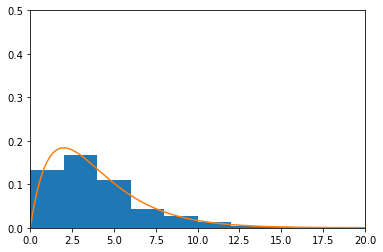

In [98]:
data=gamm.rvs(size=1000)
x=np.linspace(0,20,100)

plt.hist(data,density=True)
plt.plot(x,gamm.pdf(x))

plt.ylim([0,0.5])
plt.xlim([0,20])

Считаем мат ожид и дисперсию, далее строим гистограммы выборочных средних и рисуем плотность соответствующего нормального распределения (по ЦПТ)

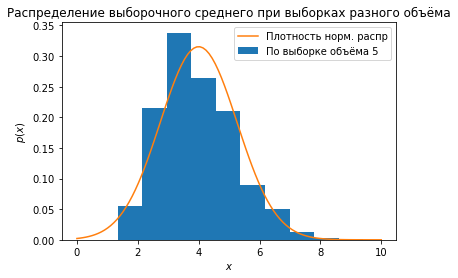

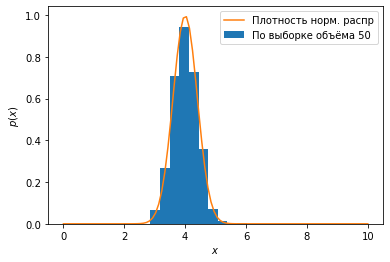

In [111]:
mean=k*thet
disper=k*thet**2

sum=0
ob=[]
x1=np.linspace(0,10,100)
plt.title('Распределение выборочного среднего при выборках разного объёма')
for n in [5,10,50]:
    for i in range(0,1000):
        data1=gamm.rvs(size=n)
        for j in range(0,n):
            sum+=data1[j]
        ob.append(sum/n)
        sum=0
    plt.hist(ob,density=True,label='По выборке объёма %s'%n)
    
    norm_rv=sts.norm(loc=mean, scale=(disper/n)**0.5)
    plt.plot(x1,norm_rv.pdf(x1),label='Плотность норм. распр')
    plt.xlabel('$x$')
    plt.ylabel('$p(x)$')
    plt.legend()
    
    plt.show()
    ob.clear()

На первом графике видны выбивающиеся значения, с ростом n гистограмма все лучше и лучше приближается нормальным распределением, и, соответственно, повышается точность аппроксимации распределения выборочных средних